# Multiple Linear Regression

Importing the libraries


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', 200)

Creating a df with the disease rates for each city and their respective suicide rates

In [44]:
df1 = pd.read_csv('../../TabNet/complete_rates_2015.csv', index_col=[0])
df2 = pd.read_csv('../../TabNet/complete_rates_2016.csv', index_col=[0])
df3 = pd.read_csv('../../TabNet/complete_rates_2017.csv', index_col=[0])
frames = [df1, df2, df3]
df = pd.concat(frames)
df = df.drop('MUNCOD', 1)

## Strategy 1: don't remove anything

Selecting X (independent variables) and y (dependent variable).

In [23]:
X = df.iloc[:, 0:14].values
y = df.iloc[:, -1].values

Mean Absolute Error: 8.267622769057777

Mean Squared Error: 153.8491002206912

Root Mean Squared Error: 12.403592230506904

## Strategy 2: imput values

In [29]:
import numpy as np
from sklearn.impute import SimpleImputer
df.loc[:, df.columns != 'RATE'] = df.loc[:, df.columns != 'RATE'].replace(0, np.nan)

X = df.iloc[:, 0:14].values
y = df.iloc[:, -1].values
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(X)
X = imputer.transform(X)

Mean Absolute Error: 7.662033663741531

Mean Squared Error: 140.1457120861195

Root Mean Squared Error: 11.83831542433802

## Strategy 3: remove rows + fill null
Remove rows where there are less than N non-null items 

Fill null items with 0

In [34]:
import numpy as np
N = 12
df.loc[:, df.columns != 'RATE'] = df.loc[:, df.columns != 'RATE'].replace(0, np.nan)
df = df.dropna(thresh=N) # At least N non null items
df = df.fillna(0)
X = df.iloc[:, 0:14].values
y = df.iloc[:, -1].values

Mean Absolute Error: 4.194893294400315

Mean Squared Error: 39.50162865127458

Root Mean Squared Error: 6.2850321121912005

## Strategy 4: remove rows + imput values

In [45]:
import numpy as np
from sklearn.impute import SimpleImputer
N = 12
df.loc[:, df.columns != 'RATE'] = df.loc[:, df.columns != 'RATE'].replace(0, np.nan)
df = df.dropna(thresh=N) # At least N non null items

X = df.iloc[:, 0:14].values
y = df.iloc[:, -1].values

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(X)
X = imputer.transform(X)

Mean Absolute Error: 4.127271034247071

Mean Squared Error: 38.71062741617397

Root Mean Squared Error: 6.2217865132270465

Splitting the dataset

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

Fitting Multiple Linear Regression to the Training Set

In [47]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predicting the Test set results

In [48]:
y_pred = regressor.predict(X_test)

In [43]:
regressor.coef_

array([ 6.91650131e-03,  1.14217262e-04, -5.38025979e-03,  2.33029324e-02,
        1.03934454e-02,  1.14910423e-02,  3.51664407e-01,  5.05684125e-03,
        2.36695985e-02, -9.83005205e-04])

In [49]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score: "+ str(regressor.score(X_test,y_test)))

Mean Absolute Error: 4.037455512181644
Mean Squared Error: 40.01793515348452
Root Mean Squared Error: 6.32597305981337
Score: 0.16485904730460688


In [16]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.head(25)

,Actual,Predicted
0,11.073146,7.809507
1,5.501700,7.052390
2,5.806864,13.756918
3,3.646641,5.431245
4,6.230798,9.124833
5,2.175592,11.242092
6,10.708931,18.049443
7,9.251764,7.476490
8,10.333781,10.418850
9,5.738363,8.156379


# Backward Elimination

Building the optimal model using Backward Elimination

In [17]:
import statsmodels.api as sm
X = np.append(arr = np.ones((len(X),1)).astype(int), values=X,axis=1)

In [18]:
X_opt = X[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]]
X_opt = np.array(X_opt, dtype=float)
regressor_ols = sm.OLS(endog=y,exog=X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     64.53
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          5.58e-163
Time:                        19:44:41   Log-Likelihood:                -11421.
No. Observations:                3561   AIC:                         2.287e+04
Df Residuals:                    3546   BIC:                         2.296e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6911      0.320      5.291      0.000       1.064       2.318
x1             0.0693      0.012      5.939      0.000       0.046       0.092
x2             0.0066      0.003      2.211      0.027       0.001       0.013
x3            -0.0008      0.001     -0.786      0.432      -0.003       0.001
x4             0.0010      0.001      0.742      0.458      -0.002       0.004
x5             0.1492      0.029      5.224      0.000       0.093       0.205
x6            -0.0113      0.004     -2.694      0.007      -0.020      -0.003
x7             0.0238      0.008      3.097      0.002       0.009       0.039
x8             0.0099      0.001     10.326      0.000       0.008       0.012
x9             0.0098      0.002      4.534      0.000       0.006       0.014
x10            0.2731      0.047      5.830      0.000       0.181       0.365
x11            0.0047      0.002      2.691      0.007       0.001       0.008
x12            0.0273      0.003     10.090      0.000       0.022       0.033
x13           -0.0004      0.001     -0.305      0.761      -0.003       0.002
x14            0.0127      0.007      1.870      0.062      -0.001       0.026
==============================================================================
Omnibus:                     2716.881   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           134467.937
Skew:                           3.160   Prob(JB):                         0.00
Kurtosis:                      32.433   Cond. No.                         923.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Removing predictor x13 (ASMA)

In [19]:
X_opt = X[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,14]]
X_opt = np.array(X_opt, dtype=float)
regressor_ols = sm.OLS(endog=y,exog=X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     69.50
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          6.86e-164
Time:                        19:46:04   Log-Likelihood:                -11421.
No. Observations:                3561   AIC:                         2.287e+04
Df Residuals:                    3547   BIC:                         2.296e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6838      0.319      5.284      0.000       1.059       2.309
x1             0.0693      0.012      5.939      0.000       0.046       0.092
x2             0.0067      0.003      2.239      0.025       0.001       0.013
x3            -0.0009      0.001     -0.926      0.355      -0.003       0.001
x4             0.0009      0.001      0.680      0.497      -0.002       0.003
x5             0.1497      0.029      5.248      0.000       0.094       0.206
x6            -0.0112      0.004     -2.685      0.007      -0.019      -0.003
x7             0.0236      0.008      3.084      0.002       0.009       0.039
x8             0.0099      0.001     10.373      0.000       0.008       0.012
x9             0.0098      0.002      4.549      0.000       0.006       0.014
x10            0.2725      0.047      5.823      0.000       0.181       0.364
x11            0.0047      0.002      2.682      0.007       0.001       0.008
x12            0.0274      0.003     10.219      0.000       0.022       0.033
x13            0.0126      0.007      1.855      0.064      -0.001       0.026
==============================================================================
Omnibus:                     2716.906   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           134647.142
Skew:                           3.160   Prob(JB):                         0.00
Kurtosis:                      32.454   Cond. No.                         891.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Removing predictor x4 (HIPERTENSAO_ESSECIAL)

In [20]:
X_opt = X[:, [0,1,2,3,5,6,7,8,9,10,11,12,14]]
X_opt = np.array(X_opt, dtype=float)
regressor_ols = sm.OLS(endog=y,exog=X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     75.26
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          9.72e-165
Time:                        19:46:16   Log-Likelihood:                -11421.
No. Observations:                3561   AIC:                         2.287e+04
Df Residuals:                    3548   BIC:                         2.295e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6873      0.319      5.296      0.000       1.063       2.312
x1             0.0692      0.012      5.934      0.000       0.046       0.092
x2             0.0066      0.003      2.205      0.028       0.001       0.012
x3            -0.0009      0.001     -0.964      0.335      -0.003       0.001
x4             0.1496      0.029      5.246      0.000       0.094       0.206
x5            -0.0109      0.004     -2.626      0.009      -0.019      -0.003
x6             0.0241      0.008      3.162      0.002       0.009       0.039
x7             0.0099      0.001     10.377      0.000       0.008       0.012
x8             0.0099      0.002      4.567      0.000       0.006       0.014
x9             0.2737      0.047      5.852      0.000       0.182       0.365
x10            0.0052      0.002      3.269      0.001       0.002       0.008
x11            0.0273      0.003     10.198      0.000       0.022       0.033
x12            0.0126      0.007      1.854      0.064      -0.001       0.026
==============================================================================
Omnibus:                     2717.706   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           135006.143
Skew:                           3.160   Prob(JB):                         0.00
Kurtosis:                      32.495   Cond. No.                         874.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Removing predictor x3 (INSUFICIENCIA_CARDIACA)

In [21]:
X_opt = X[:, [0,1,2,5,6,7,8,9,10,11,12,14]]
X_opt = np.array(X_opt, dtype=float)
regressor_ols = sm.OLS(endog=y,exog=X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     82.02
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          1.66e-165
Time:                        19:46:29   Log-Likelihood:                -11421.
No. Observations:                3561   AIC:                         2.287e+04
Df Residuals:                    3549   BIC:                         2.294e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6870      0.319      5.295      0.000       1.062       2.312
x1             0.0689      0.012      5.910      0.000       0.046       0.092
x2             0.0064      0.003      2.151      0.032       0.001       0.012
x3             0.1494      0.029      5.238      0.000       0.093       0.205
x4            -0.0114      0.004     -2.754      0.006      -0.019      -0.003
x5             0.0246      0.008      3.226      0.001       0.010       0.039
x6             0.0096      0.001     10.619      0.000       0.008       0.011
x7             0.0098      0.002      4.551      0.000       0.006       0.014
x8             0.2741      0.047      5.861      0.000       0.182       0.366
x9             0.0048      0.002      3.125      0.002       0.002       0.008
x10            0.0268      0.003     10.183      0.000       0.022       0.032
x11            0.0127      0.007      1.868      0.062      -0.001       0.026
==============================================================================
Omnibus:                     2716.217   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           134376.143
Skew:                           3.159   Prob(JB):                         0.00
Kurtosis:                      32.423   Cond. No.                         671.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Removing predictor x10 (AIDS)

In [22]:
X_opt = X[:, [0,1,2,5,6,7,8,9,10,11,12]]
X_opt = np.array(X_opt, dtype=float)
regressor_ols = sm.OLS(endog=y,exog=X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     89.81
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          9.59e-166
Time:                        19:49:47   Log-Likelihood:                -11423.
No. Observations:                3561   AIC:                         2.287e+04
Df Residuals:                    3550   BIC:                         2.294e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8349      0.309      5.944      0.000       1.230       2.440
x1             0.0695      0.012      5.962      0.000       0.047       0.092
x2             0.0065      0.003      2.185      0.029       0.001       0.012
x3             0.1466      0.028      5.146      0.000       0.091       0.202
x4            -0.0110      0.004     -2.659      0.008      -0.019      -0.003
x5             0.0246      0.008      3.234      0.001       0.010       0.040
x6             0.0095      0.001     10.562      0.000       0.008       0.011
x7             0.0098      0.002      4.523      0.000       0.006       0.014
x8             0.2683      0.047      5.747      0.000       0.177       0.360
x9             0.0047      0.002      3.067      0.002       0.002       0.008
x10            0.0275      0.003     10.514      0.000       0.022       0.033
==============================================================================
Omnibus:                     2721.934   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           135926.981
Skew:                           3.166   Prob(JB):                         0.00
Kurtosis:                      32.597   Cond. No.                         649.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
chosen = list(map(lambda x: x-1, [1,2,5,6,7,8,9,10,11,12]))
values = df.columns.values
chosen_values = [values[i] for i in chosen]
print("Disease list: " + str(chosen_values))

Disease list: ['OSTEOPOROSE', 'INSUFICIENCIA_RENAL', 'ESCLEROSE_MULTIPLA', 'EPILEPSIA', 'ENXAQUECA', 'DPOC', 'DORSOPATIAS', 'DOENCA_DE_PARKINSON', 'DIABETES_MELLITUS', 'CANCER']


In [34]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,9.532888,19.065777,28.598665,266.920877,4.193402,38.131554,9.532888,28.598665,190.657769,3.235451,95.328885,28.598665,343.183985,28.598665
1,15.330369,26.828147,406.254791,46.769637,3.832592,3.832592,9.851766,141.805918,38.325924,3.832592,168.634064,130.308140,65.154070,11.497777
2,78.371023,105.444649,253.637128,4.274783,2.849855,34.198264,9.851766,286.410465,1.424928,4.274783,49.872469,190.940310,68.396529,14.660371
3,38.679108,35.455849,214.346726,4.834889,2.417444,136.182694,35.455849,146.658286,11.281407,0.805815,28.203517,97.503586,38.679108,8.863962
4,4.093244,34.792575,141.216921,472.769694,4.193402,65.491906,2.046622,306.993308,2.046622,3.235451,221.035181,69.585150,235.361536,14.660371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775,7.370826,51.595784,147.416525,36.854131,4.193402,51.595784,9.851766,493.845360,14.741653,7.370826,103.191568,154.787352,51.595784,14.660371
1776,23.841454,46.192818,132.618090,22.351363,4.193402,25.331545,7.450454,137.088362,22.351363,3.235451,47.682909,108.776635,34.272091,28.311727
1777,8.130691,39.402582,48.575670,5.420461,0.416959,22.724240,4.169585,12.091798,10.423963,0.416959,45.656960,99.861570,51.494379,13.551152
1778,9.948599,96.169789,86.221191,23.213397,4.193402,3.316200,3.316200,9.948599,17.681135,3.235451,29.845797,43.110595,6.632399,16.580998


Using only the significant fields:

In [41]:
X = df.iloc[:, [1,2,5,6,7,8,9,10,11,12]].values
imputer = imputer.fit(X)
X = imputer.transform(X)
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.048831360464352
Mean Squared Error: 39.54833687171769
Root Mean Squared Error: 6.288746844301946


Correlation Matrix

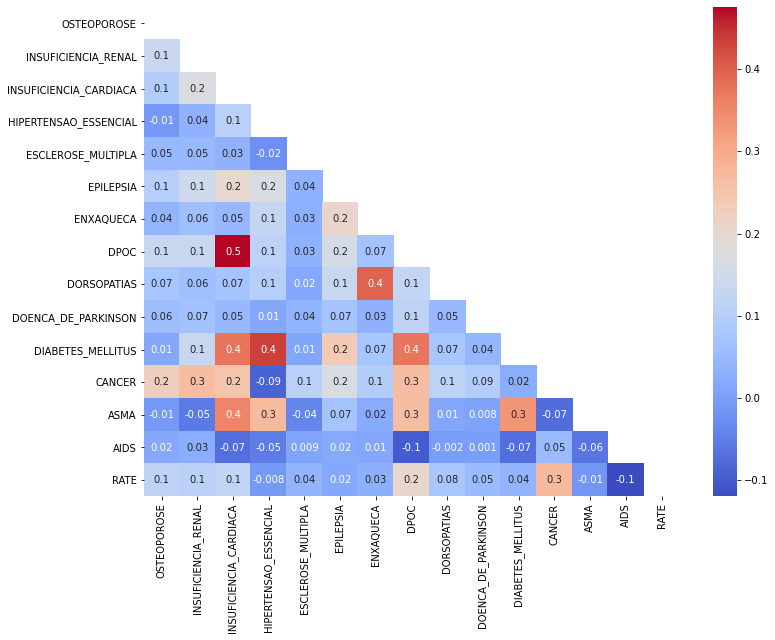

In [3]:
plt.figure(figsize=(12, 9))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True,fmt='.1g', cmap= 'coolwarm', mask=matrix)

Recursive Feature Elimination

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
X = df.drop('RATE', axis=1)
y = df['RATE']
rfc = LinearRegression()
rfecv = RFECV(estimator=rfc, step=1)
rfecv.fit(X, y)

RFECV(cv=None,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [13]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 12


In [19]:
feature_importance = list(zip(df.columns,rfecv.support_))

new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['OSTEOPOROSE', 'INSUFICIENCIA_RENAL', 'ESCLEROSE_MULTIPLA', 'EPILEPSIA', 'ENXAQUECA', 'DPOC', 'DORSOPATIAS', 'DOENCA_DE_PARKINSON', 'DIABETES_MELLITUS', 'CANCER', 'ASMA', 'AIDS']
